# Pattern Recognition and Machine Learning

## Project : Facial Analytics for BMI Prediction and Gender Classification

# Data Preprocessing

### Importing required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.15.0
Is GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-11-26 20:30:44.587271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-26 20:30:44.864945: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-26 20:30:44.864987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


#### Read the CSV file and store the columns we require in required data dataframe

In [4]:
csv_path = 'csv/person.csv'
df = pd.read_csv(csv_path,sep = ';')

required_data = df[['id','sex','height','weight']]

#### This is how the required_data dataframe look like 

In [5]:
required_data.head(5)

id   sex  height  weight
0  A00147  Male    67.0   185.0
1  A00220  Male    73.0   155.0
2  A00360  Male    69.0   167.0
3  A00367  Male    72.0   245.0
4  A01054  Male    67.0   166.0

- Adding height_m (height in meters) , weight_kg (Weight in kilo grams) to required_data dataframe<br>
- Adding a column BMI to our dataframe (BMI = weight(kgs) / (height(meters) ** 2))
- Adding a Gender column which has 1 for male and 0 for female ,filled based on sex column

In [6]:
# Convert height from inches to meters and weight from weight from pounds to kilograms
required_data['height_m'] = required_data['height'] * 0.0254
required_data['weight_kg'] = required_data['weight'] * 0.453592

 # Calculating BMI 
required_data['BMI'] = required_data['weight_kg'] / (required_data['height_m'] ** 2)

# Encode gender
required_data['sex'] = required_data['sex'].fillna('')
required_data['Gender'] = required_data['sex'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)


/tmp/ipykernel_2026/449751129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['height_m'] = required_data['height'] * 0.0254
/tmp/ipykernel_2026/449751129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['weight_kg'] = required_data['weight'] * 0.453592
/tmp/ipykernel_2026/449751129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

#### Adding paths for front and side for respective persons 

In [7]:
# Define image directories
front_dir = '/root/PRML_Project/front/front'
side_dir = '/root/PRML_Project/side/side'

# Add image paths to the DataFrame
required_data['front_image'] = required_data['id'].apply(lambda x: os.path.join(front_dir, f'{x}.jpg'))
required_data['side_image'] = required_data['id'].apply(lambda x: os.path.join(side_dir, f'{x}.jpg'))

/tmp/ipykernel_2026/684946245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['front_image'] = required_data['id'].apply(lambda x: os.path.join(front_dir, f'{x}.jpg'))
/tmp/ipykernel_2026/684946245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['side_image'] = required_data['id'].apply(lambda x: os.path.join(side_dir, f'{x}.jpg'))


#### This is how our dataframe looks like , `required_data` has all the needed information of the persons

In [8]:
required_data.head(5)

id   sex  height  weight  height_m   weight_kg        BMI  Gender  \
0  A00147  Male    67.0   185.0    1.7018   83.914520  28.974775       1   
1  A00220  Male    73.0   155.0    1.8542   70.306760  20.449558       1   
2  A00360  Male    69.0   167.0    1.7526   75.749864  24.661316       1   
3  A00367  Male    72.0   245.0    1.8288  111.130040  33.227605       1   
4  A01054  Male    67.0   166.0    1.7018   75.296272  25.998988       1   

                                 front_image  \
0  /root/PRML_Project/front/front/A00147.jpg   
1  /root/PRML_Project/front/front/A00220.jpg   
2  /root/PRML_Project/front/front/A00360.jpg   
3  /root/PRML_Project/front/front/A00367.jpg   
4  /root/PRML_Project/front/front/A01054.jpg   

                                side_image  
0  /root/PRML_Project/side/side/A00147.jpg  
1  /root/PRML_Project/side/side/A00220.jpg  
2  /root/PRML_Project/side/side/A00360.jpg  
3  /root/PRML_Project/side/side/A00367.jpg  
4  /root/PRML_Project/side/side/A01054.jpg

#### Now we remove all the currupted or missing information from the dataframe and store the processed dataframe to avoid reprocessing always in future

In [ ]:
# Initialize lists
valid_indices = []

# Function to load and preprocess images
def load_image(path):
    try:
        img = load_img(path, target_size=(224, 224))
        img = img_to_array(img)
        img = img / 255.0  # Normalize to [0, 1]
        return img
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None
    
# Loop over DataFrame rows
for idx, row in required_data.iterrows():
    front_img = load_image(row['front_image'])
    side_img = load_image(row['side_image'])
    
    if front_img is not None and side_img is not None:
        valid_indices.append(idx)

# Filter the DataFrame to keep only valid entries
required_data = required_data.loc[valid_indices].reset_index(drop=True)

#### Save the processed dataframe ,so the information can be accessed directly 

In [10]:
required_data.to_csv("processed_data.csv",index=False)

# Model training

### Import the required libraries

In [18]:

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint

#### Load the processed data

In [2]:
required_data = pd.read_csv("processed_data.csv")

#### We need to input the images in array format to the model since we cannot give string as input,so to avoid converting images into arrays each time we load the file , convert the required images into numy arrays and save them ,so when required load the arrays directly.

Once performed No need of running the below cell multiple times ,so commented

In [3]:
# import os
# import numpy as np
# import pandas as pd
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Function to load and preprocess images
# def load_image(path):
#     try:
#         img = load_img(path, target_size=(224, 224))
#         img = img_to_array(img)
#         img = img / 255.0  # Normalize to [0, 1]
#         return img
#     except Exception as e:
#         print(f"Error loading image {path}: {e}")
#         return None

# # Initialize lists
# front_images = []
# side_images = []
# bmi_values = []
# gender_values = []

# # Process images in batches
# batch_size = 100  # Adjust batch size as needed
# num_batches = len(required_data) // batch_size + 1

# for batch_num in range(num_batches):
#     start_idx = batch_num * batch_size
#     end_idx = min((batch_num + 1) * batch_size, len(required_data))
#     batch_data = required_data.iloc[start_idx:end_idx]
    
#     for _, row in batch_data.iterrows():
#         front_img = load_image(row['front_image'])
#         side_img = load_image(row['side_image'])
        
#         if front_img is not None and side_img is not None:
#             front_images.append(front_img)
#             side_images.append(side_img)
#             bmi_values.append(row['BMI'])
#             gender_values.append(row['Gender'])
    
#     # Save batch to disk
#     np.save(f'front_images_batch_{batch_num}.npy', np.array(front_images))
#     np.save(f'side_images_batch_{batch_num}.npy', np.array(side_images))
#     np.save(f'bmi_values_batch_{batch_num}.npy', np.array(bmi_values))
#     np.save(f'gender_values_batch_{batch_num}.npy', np.array(gender_values))
    
#     # Clear lists for next batch
#     front_images.clear()
#     side_images.clear()
#     bmi_values.clear()
#     gender_values.clear()

# Dataset Creation

#### Load the numpy arrays of images

In [10]:
import os
import numpy as np

# Get the list of saved NumPy files
num_batches = len([name for name in os.listdir() if name.startswith('front_images_batch_')])

# for manual control
num_batches = 550

front_files = [f'front_images_batch_{i}.npy' for i in range(num_batches)]
side_files = [f'side_images_batch_{i}.npy' for i in range(num_batches)]
bmi_files = [f'bmi_values_batch_{i}.npy' for i in range(num_batches)]
gender_files = [f'gender_values_batch_{i}.npy' for i in range(num_batches)]

#### The below is the data generator for our model, the below function divides the data into batches and feeds it to model in real time this will be a faster way and memory will be managed properly using this , since our dataset is very large and we cannot feed all at once to the model

In [11]:
def data_generator(front_files, side_files, bmi_files, gender_files, batch_size):
    num_files = len(front_files)
    file_indices = np.arange(num_files)
    while True:
        np.random.shuffle(file_indices)
        for idx in file_indices:
            # Load the batch data
            X_front = np.load(front_files[idx])
            X_side = np.load(side_files[idx])
            y_bmi = np.load(bmi_files[idx])
            y_gender = np.load(gender_files[idx])
            
            num_samples = X_front.shape[0]
            sample_indices = np.arange(num_samples)
            np.random.shuffle(sample_indices)
            
            for start_idx in range(0, num_samples, batch_size):
                end_idx = min(start_idx + batch_size, num_samples)
                batch_indices = sample_indices[start_idx:end_idx]
                front_batch = X_front[batch_indices]
                side_batch = X_side[batch_indices]
                bmi_batch = y_bmi[batch_indices]
                gender_batch = y_gender[batch_indices]
                yield ([front_batch, side_batch], [bmi_batch, gender_batch])

#### Split into training and validation subfiles

In [12]:
# Split index for 80-20 split
split_index = int(0.8 * num_batches)

# Training files
train_front_files = front_files[:split_index]
train_side_files = side_files[:split_index]
train_bmi_files = bmi_files[:split_index]
train_gender_files = gender_files[:split_index]

# Validation files
val_front_files = front_files[split_index:]
val_side_files = side_files[split_index:]
val_bmi_files = bmi_files[split_index:]
val_gender_files = gender_files[split_index:]

In [13]:
print(len(train_front_files))

440


#### Create train and test data generators

In [14]:
batch_size = 64
train_generator = data_generator(
    train_front_files, train_side_files, train_bmi_files, train_gender_files, batch_size)

val_generator = data_generator(
    val_front_files, val_side_files, val_bmi_files, val_gender_files, batch_size)

## Defining the model Architecture

<img src="PRMLARCH.png" alt="PRML Architecture" width="800" />


### Dual-Input CNN Model for BMI and Gender Prediction

This model processes two images (front and side views) to predict BMI and classify gender using multi-task learning.

1. **Inputs:**
   - `front_input` and `side_input`: Image inputs of shape `(224, 224, 3)`.

2. **CNN Feature Extraction:**
   - Separate CNN branches extract features from each input using `Conv2D`, `MaxPooling2D`, and `Flatten` layers.

3. **Feature Combination:**
   - Features from both CNN branches are merged using a `Concatenate` layer.

4. **Outputs:**
   - **BMI Prediction:** Single output neuron with linear activation (`bmi_output`).
   - **Gender Classification:** Single output neuron with sigmoid activation (`gender_output`).

5. **Architecture Summary:**
   - Multi-task model with shared feature extraction and separate output heads for BMI regression and gender classification.


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Model
# Input layers
input_front = layers.Input(shape=(224, 224, 3), name="front_input")
input_side = layers.Input(shape=(224, 224, 3), name="side_input")

# CNN for front image
x1 = layers.Conv2D(32, (3, 3), activation='relu')(input_front)
x1 = layers.MaxPooling2D((2, 2))(x1)
x1 = layers.Flatten()(x1)

# CNN for side image
x2 = layers.Conv2D(32, (3, 3), activation='relu')(input_side)
x2 = layers.MaxPooling2D((2, 2))(x2)
x2 = layers.Flatten()(x2)

# Combine features
combined = layers.Concatenate()([x1, x2])

# BMI Prediction Head
bmi_output = layers.Dense(1, activation='linear', name="bmi_output")(combined)

# Gender Classification Head
gender_output = layers.Dense(1, activation='sigmoid', name="gender_output")(combined)

# Build model
model = Model(inputs=[input_front, input_side], outputs=[bmi_output, gender_output])

### Compiling the Model

This cell compiles the model with the following settings:

- **Optimizer:** `adam` for efficient gradient-based optimization.
- **Loss Functions:**
  - `mse` (Mean Squared Error) for `bmi_output`.
  - `binary_crossentropy` for `gender_output`.
- **Metrics:**
  - For `bmi_output`: `mae` (Mean Absolute Error) and `mse`.
  - For `gender_output`: `accuracy`.


In [16]:
model.compile(
    optimizer='adam',
    loss={'bmi_output': 'mse', 'gender_output': 'binary_crossentropy'},
    metrics={'bmi_output': ['mae', 'mse'], 'gender_output': ['accuracy']}
)


### Training the Model

1. **Checkpoint Callback:**
   - Saves the best model based on lowest `val_loss`.

2. **Model Training:**
   - Uses `train_generator` and `val_generator` with specified steps, epochs, and callback.


In [ ]:
# Calculate the total number of samples
total_samples = len(required_data)
train_samples = int(0.8 * total_samples)
validation_samples = total_samples - train_samples
steps_per_epoch = train_samples // batch_size
validation_steps = validation_samples // batch_size

# Define the checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_most_Data_generator.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=100,
    callbacks=[checkpoint_callback]
)

Epoch 1/100
750/751 [============================>.] - ETA: 0s - loss: 20.5505 - bmi_output_loss: 20.4469 - gender_output_loss: 0.1036 - bmi_output_mae: 3.4420 - bmi_output_mse: 20.4469 - gender_output_accuracy: 0.9832

In [ ]:
model.save("best_model_most_Data_generator.h5")

/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction and Results

2024-11-29 18:17:44.134866: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29 18:17:44.328399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29 18:17:44.328439: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29 18:17:44.331140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-29 18:17:44.331187: I external/local_xla/xla/stream_executor

1/1 [==============================] - 1s 749ms/step


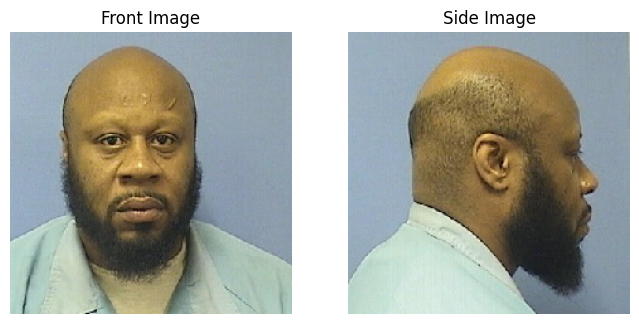

ID: M28154
Actual BMI: 34.46, Predicted BMI: 33.49
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 43ms/step


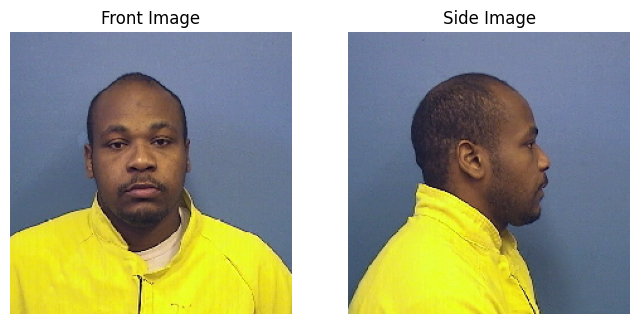

ID: M19536
Actual BMI: 31.01, Predicted BMI: 29.03
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 43ms/step


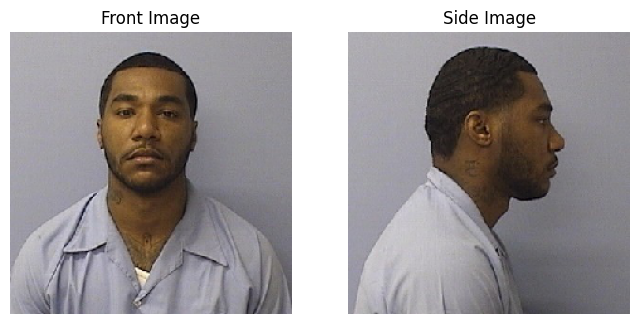

ID: R59247
Actual BMI: 23.63, Predicted BMI: 27.35
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 44ms/step


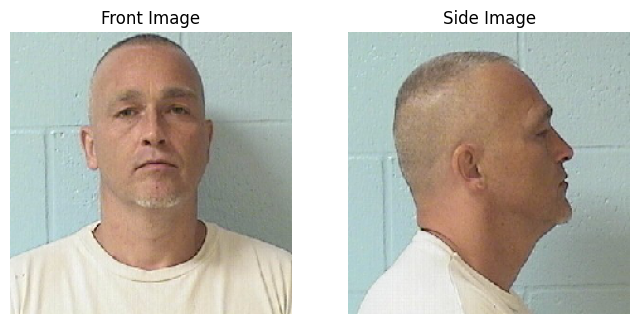

ID: B26160
Actual BMI: 25.11, Predicted BMI: 26.62
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 45ms/step


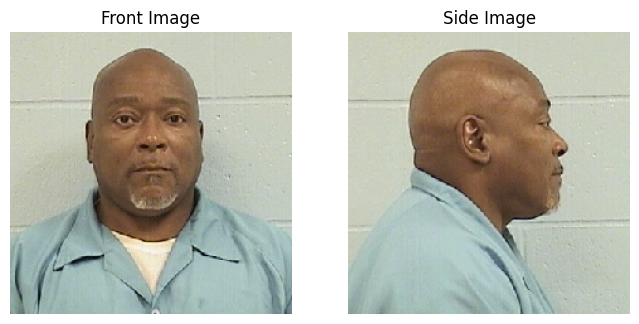

ID: N30637
Actual BMI: 35.43, Predicted BMI: 35.85
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 44ms/step


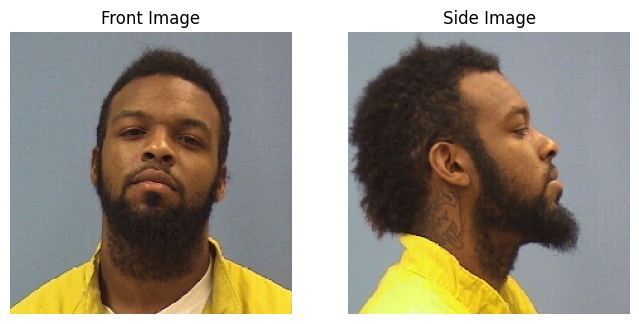

ID: M54568
Actual BMI: 26.29, Predicted BMI: 26.35
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 44ms/step


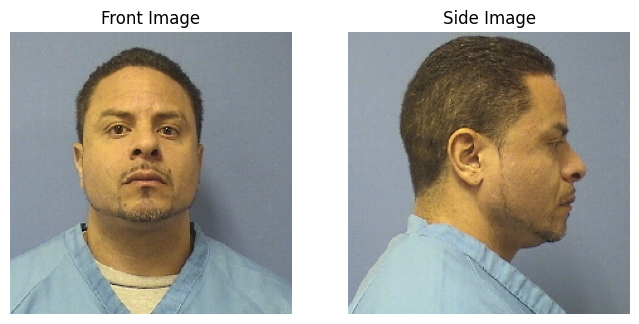

ID: R02806
Actual BMI: 31.01, Predicted BMI: 30.80
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 42ms/step


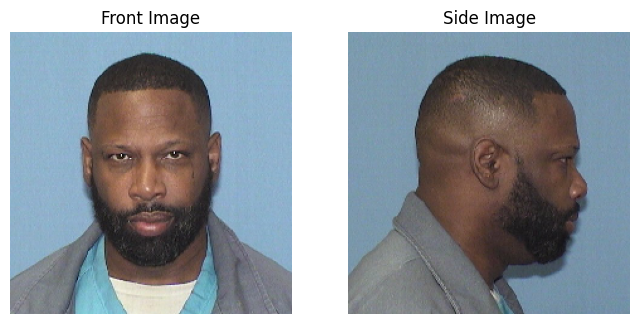

ID: B20710
Actual BMI: 31.00, Predicted BMI: 30.00
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 47ms/step


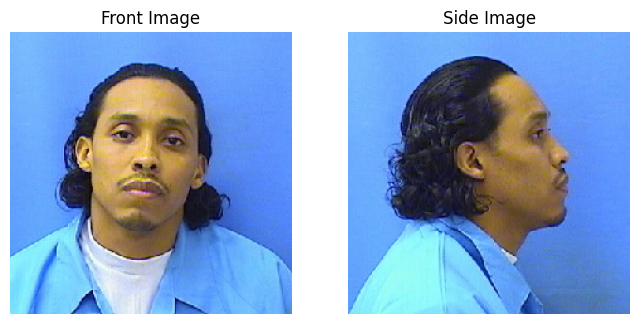

ID: M38074
Actual BMI: 23.18, Predicted BMI: 21.99
Actual Gender: Male, Predicted Gender: Male
----------------------------------------
1/1 [==============================] - 0s 44ms/step


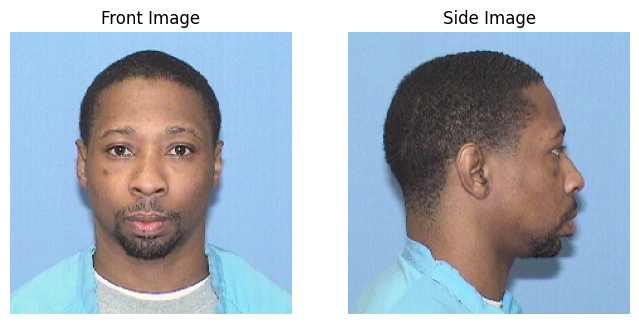

ID: R41694
Actual BMI: 22.46, Predicted BMI: 23.00
Actual Gender: Male, Predicted Gender: Male
----------------------------------------


In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
# Select random samples
num_samples = 10
required_data = pd.read_csv("processed_data.csv")
samples = required_data.sample(n=num_samples)

for idx, row in samples.iterrows():
    # Load front and side images
    front_path = row['front_image']
    side_path = row['side_image']
    
    try:
        front_img = load_img(front_path, target_size=(224, 224))
        side_img = load_img(side_path, target_size=(224, 224))
    except:
        print(f"Error loading images for ID {row['id']}")
        continue
    
    # Prepare images for prediction
    front_array = img_to_array(front_img) / 255.0
    side_array = img_to_array(side_img) / 255.0
    front_array = np.expand_dims(front_array, axis=0)
    side_array = np.expand_dims(side_array, axis=0)
    
    # Predict BMI and gender
    model = load_model('models/40_epoch_model.h5')
    bmi_pred, gender_pred = model.predict([front_array, side_array])
    predicted_bmi = bmi_pred[0][0]
    predicted_gender = 'Male' if gender_pred[0][0] > 0.5 else 'Female'
    
    # Actual values
    actual_bmi = row['BMI']
    actual_gender = row['sex']
    
    # Display images and results
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(front_img)
    axs[0].axis('off')
    axs[0].set_title('Front Image')
    axs[1].imshow(side_img)
    axs[1].axis('off')
    axs[1].set_title('Side Image')
    plt.show()
    
    print(f"ID: {row['id']}")
    print(f"Actual BMI: {actual_bmi:.2f}, Predicted BMI: {predicted_bmi:.2f}")
    print(f"Actual Gender: {actual_gender}, Predicted Gender: {predicted_gender}")
    print('-' * 40)

# Validating the model

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the model
model = load_model('models/40_epoch_model.h5')

# Load validation data
required_data = pd.read_csv("processed_data.csv")

# Split the data into validation set (assuming 80-20 split)
split_index = int(0.98 * len(required_data))
validation_data = required_data.iloc[split_index:].reset_index(drop=True)

# Initialize counters
correct_bmi = 0
correct_gender = 0
correct_both = 0
total_samples = len(validation_data)

# Iterate over validation samples
for idx, row in validation_data.iterrows():
    # Load and preprocess images
    front_path = row['front_image']
    side_path = row['side_image']
    
    try:
        front_img = load_img(front_path, target_size=(224, 224))
        side_img = load_img(side_path, target_size=(224, 224))
    except Exception as e:
        print(f"Error loading images for ID {row['id']}: {e}")
        continue
    
    front_array = img_to_array(front_img) / 255.0
    side_array = img_to_array(side_img) / 255.0
    front_array = np.expand_dims(front_array, axis=0)
    side_array = np.expand_dims(side_array, axis=0)
    
    # Make predictions
    bmi_pred, gender_pred = model.predict([front_array, side_array])
    predicted_bmi = bmi_pred[0][0]
    predicted_gender = 'Male' if gender_pred[0][0] > 0.5 else 'Female'
    
    # Actual values
    actual_bmi = row['BMI']
    actual_gender = 'Male' if row['Gender'] == 1 else 'Female'
    
    # Check BMI prediction
    bmi_correct = abs(predicted_bmi - actual_bmi) <= 5
    
    # Check gender prediction
    gender_correct = predicted_gender == actual_gender
    
    # Update counters
    if bmi_correct:
        correct_bmi += 1
    if gender_correct:
        correct_gender += 1
    if bmi_correct and gender_correct:
        correct_both += 1

# Calculate accuracies
bmi_accuracy = (correct_bmi / total_samples) * 100
gender_accuracy = (correct_gender / total_samples) * 100
combined_accuracy = (correct_both / total_samples) * 100

# Print accuracies and details
print(f"Total samples: {total_samples}")
print(f"BMI Accuracy (+/-2): {correct_bmi} correct predictions, Accuracy: {bmi_accuracy:.2f}%")
print(f"Gender Accuracy: {correct_gender} correct predictions, Accuracy: {gender_accuracy:.2f}%")
print(f"Combined Accuracy (Both correct): {correct_both} correct predictions, Accuracy: {combined_accuracy:.2f}%")

2024-12-02 13:32:15.476912: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 13:32:15.880410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 13:32:15.880446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 13:32:15.955199: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 13:32:16.109899: I tensorflow/core/platform/cpu_feature_guar

1/1 [==============================] - 0s 22ms/step
Total samples: 1203
BMI Accuracy (+/-2): 762 correct predictions, Accuracy: 63.34%
Gender Accuracy: 1117 correct predictions, Accuracy: 92.85%
Combined Accuracy (Both correct): 724 correct predictions, Accuracy: 60.18%


# Plotting the offences

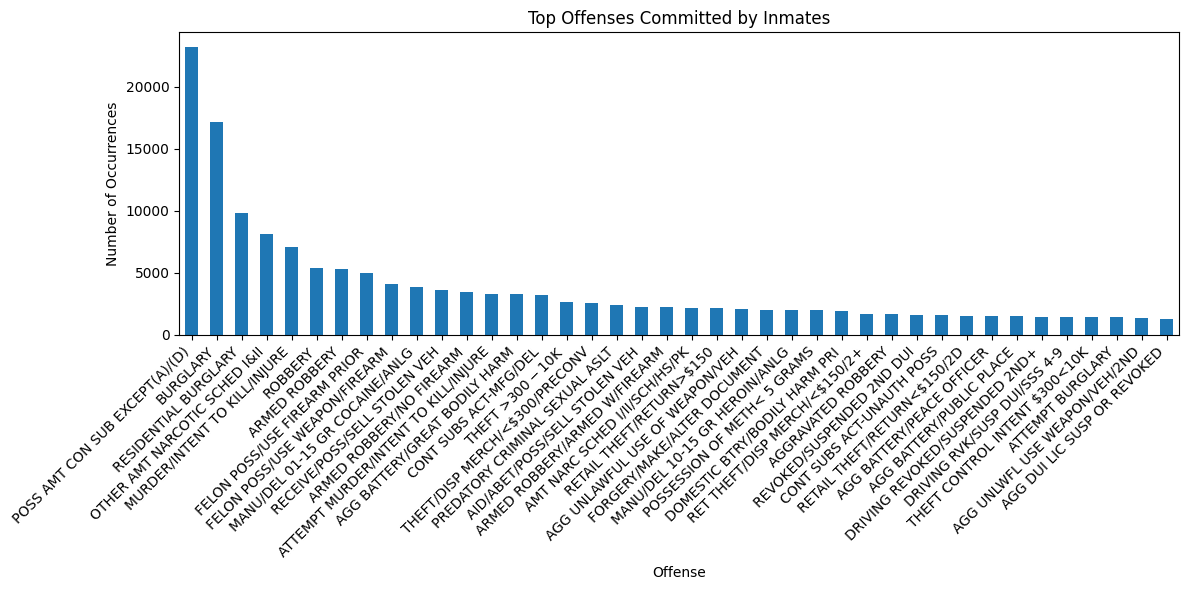

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/root/PRML_Project/csv/sentencing.csv', sep=';')

# Count the occurrences of each offense
offense_counts = df['offense'].value_counts()

# Optionally, select the top N offenses
top_n = 40
top_offenses = offense_counts.head(top_n)

# Plot the distribution
plt.figure(figsize=(12, 6))
top_offenses.plot(kind='bar')
plt.title('Top Offenses Committed by Inmates')
plt.xlabel('Offense')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Inferencing with the model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

def predict_images(front_image_path, side_image_path, model_path='models/best_model.h5'):
    # Load the model
    model = load_model(model_path)
    
    # Load and preprocess the images
    try:
        front_img = load_img(front_image_path, target_size=(224, 224))
        side_img = load_img(side_image_path, target_size=(224, 224))
    except Exception as e:
        print(f"Error loading images: {e}")
        return
    
    front_array = img_to_array(front_img) / 255.0
    side_array = img_to_array(side_img) / 255.0
    front_array = np.expand_dims(front_array, axis=0)
    side_array = np.expand_dims(side_array, axis=0)
    
    # Predict BMI and gender
    bmi_pred, gender_pred = model.predict([front_array, side_array])
    predicted_bmi = bmi_pred[0][0]
    predicted_gender = 'Male' if gender_pred[0][0] > 0.5 else 'Female'
    
    # Display images and results
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(front_img)
    axs[0].axis('off')
    axs[0].set_title('Front Image')
    axs[1].imshow(side_img)
    axs[1].axis('off')
    axs[1].set_title('Side Image')
    plt.show()
    
# Categorize BMI based on the predicted value
if predicted_bmi < 18.5:
    bmi_category = 'Underweight'
elif predicted_bmi < 25:
    bmi_category = 'Normal'
else:
    bmi_category = 'Overweight (Obese)'

# Print the predicted BMI and its category
print(f"Predicted BMI: {predicted_bmi:.2f} ({bmi_category})")
print(f"Predicted Gender: {predicted_gender}")

In [ ]:
import cv2

# Load the image
image_path = '/content/2.jpg'  # Replace with your image file path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Resize the image
    new_width = 472  # Desired width
    new_height = 476  # Desired height
    resized_image = cv2.resize(image, (new_width, new_height))

    # Save the resized image
    resized_image_path = 'madan_front.jpg'  # Path to save the resized image
    cv2.imwrite(resized_image_path, resized_image)

    print(f"Resized image saved successfully at: {resized_image_path}")
else:
    print("Error: Unable to load the image. Please check the file path.")


In [ ]:
# Sriram
front_image_path = 'path/to/front_image.jpg'
side_image_path = 'path/to/side_image.jpg'
predict_images(front_image_path, side_image_path)

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the model
model = load_model('models/40_epoch_model.h5')

# Load the data
required_data = pd.read_csv("processed_data.csv")

# Split the data into test set (20% of the data)
split_index = int(0.8 * len(required_data))
test_data = required_data.iloc[split_index:].reset_index(drop=True)

# Initialize lists to store results
actual_bmi_list = []
predicted_bmi_list = []
actual_gender_list = []
predicted_gender_list = []

# Total samples
total_samples = len(test_data)
print(total_samples)
# Process each sample
for idx, row in test_data.iterrows():
    # Load and preprocess images
    front_path = row['front_image']
    side_path = row['side_image']

    try:
        front_img = load_img(front_path, target_size=(224, 224))
        side_img = load_img(side_path, target_size=(224, 224))
    except Exception as e:
        print(f"Error loading images for ID {row['id']}: {e}")
        continue

    front_array = img_to_array(front_img) / 255.0
    side_array = img_to_array(side_img) / 255.0
    front_array = np.expand_dims(front_array, axis=0)
    side_array = np.expand_dims(side_array, axis=0)

    # Make predictions
    bmi_pred, gender_pred = model.predict([front_array, side_array])
    predicted_bmi = bmi_pred[0][0]
    predicted_gender = 'Male' if gender_pred[0][0] > 0.5 else 'Female'

    # Actual values
    actual_bmi = row['BMI']
    actual_gender = 'Male' if row['Gender'] == 1 else 'Female'

    # Append results to lists
    actual_bmi_list.append(actual_bmi)
    predicted_bmi_list.append(predicted_bmi)
    actual_gender_list.append(actual_gender)
    predicted_gender_list.append(predicted_gender)

    # Print progress
    if (idx + 1) % 10 == 0 or (idx + 1) == total_samples:
        remaining = total_samples - (idx + 1)
        print(f"Completed {idx + 1}/{total_samples} samples. Remaining: {remaining}")

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Actual_BMI': actual_bmi_list,
    'Predicted_BMI': predicted_bmi_list,
    'Actual_Gender': actual_gender_list,
    'Predicted_Gender': predicted_gender_list
})

# Save the results to a CSV file
results_df.to_csv('prediction_results.csv', index=False)

print("Results saved to 'prediction_results.csv'")

2024-12-02 17:38:35.624794: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 17:38:36.030536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 17:38:36.030573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 17:38:36.093735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 17:38:36.227126: I tensorflow/core/platform/cpu_feature_guar

12029


2024-12-02 17:39:03.905148: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 0s 17ms/step
Completed 10/12029 samples. Remaining: 12019
1/1 [==============================] - 0s 15ms/step
Completed 20/12029 samples. Remaining: 12009
1/1 [==============================] - 0s 16ms/step
Completed 30/12029 samples. Remaining: 11999
1/1 [==============================] - 0s 14ms/step
Completed 40/12029 samples. Remaining: 11989
1/1 [==============================] - 0s 14ms/step
Completed 50/12029 samples. Remaining: 11979
1/1 [==============================] - 0s 15ms/step
Completed 60/12029 samples. Remaining: 11969
1/1 [==============================] - 0s 15ms/step
Completed 70/12029 samples. Remaining: 11959
1/1 [==============================] - 0s 17ms/step
Completed 80/12029 samples. Remaining: 11949
1/1 [==============================] - 0s 14ms/step
Completed 90/12029 samples. Remaining: 11939
1/1 [==============================] - 0s 14ms/step
Completed 100/12029 samples. Remaining: 11929
1/1 [========================

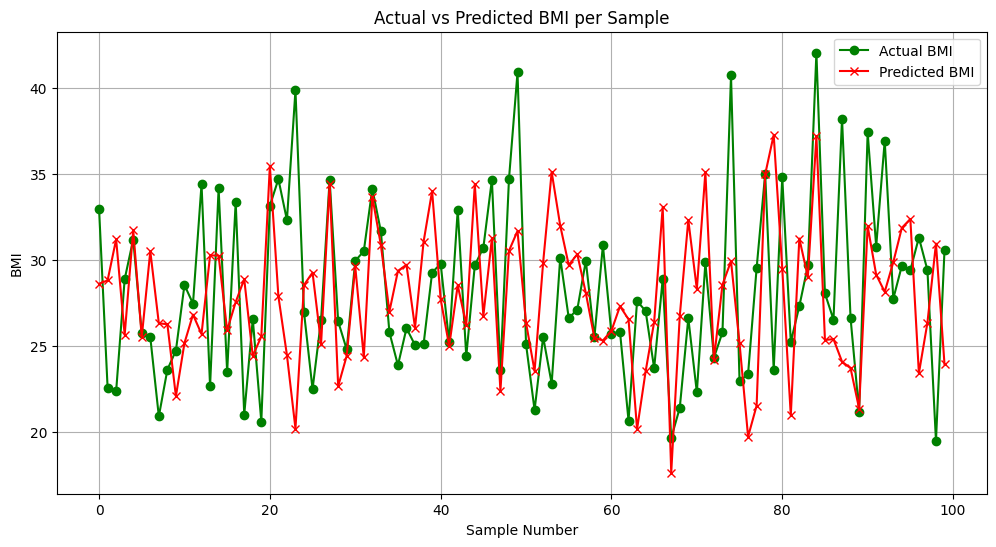

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the results from the CSV file
results_df = pd.read_csv('prediction_results.csv')[:100]

# Plot the Actual and Predicted BMI per sample
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual_BMI'], label='Actual BMI', color='green', marker='o')
plt.plot(results_df.index, results_df['Predicted_BMI'], label='Predicted BMI', color='red', marker='x')
plt.xlabel('Sample Number')
plt.ylabel('BMI')
plt.title('Actual vs Predicted BMI per Sample')
plt.legend()
plt.grid(True)
plt.show()